<a href="https://colab.research.google.com/github/Csiath/cienc-dados/blob/main/AnimalShelter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Shelter

**Nome:** Thais Santos de Miranda Costa.
**RGM**: 31893198.


- **Animal ID:** Identificador único para cada animal no conjunto de dados.
- **Name:** Nome dado ao animal.
- **DateIntake:** Data em que o animal foi admitido no abrigo.
- **Found Location:** Local onde o animal foi encontrado antes de ser levado ao abrigo.
- **Intake Type:** Descreve as circunstâncias de como o animal foi admitido no abrigo.
- **Intake Condition:** Condição de saúde do animal no momento da admissão, divido entre 'doente' (sick) ou 'normal'.
- **Animal Type:** Espécie do animal, por exemplo: cão(dog), gato(cat), pássaro(bird) ou gado(livestock).
- **Sex upon Intake:** Indica se o animal foi admitido castrado (spayed/neutered) ou não (intact).
- **Age upon Intake:** Idade do animal no momento da admissão.
- **Breed:** Raça do animal.
- **Color:** Cor da pelagem do animal.


# Importando o dataset para o google colab:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"csiath","key":"931baef5131b0899cd3e98bc0ef15243"}'}

In [ ]:
!pip install kaggle --upgrade

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d jackdaoud/animal-shelter-analytics

  0% 0.00/7.67M [00:00<?, ?B/s]
100% 7.67M/7.67M [00:00<00:00, 94.2MB/s]


In [ ]:
!kaggle datasets files jackdaoud/animal-shelter-analytics

name                                size  creationDate         
----------------------------------  ----  -------------------  
Austin_Animal_Center_Intakes.csv    19MB  2021-03-04 04:18:26  
Austin_Animal_Center_Stray_Map.csv   3KB  2021-03-04 04:18:26  
Austin_Animal_Center_Outcomes.csv   17MB  2021-03-04 04:18:26  


In [ ]:
!kaggle datasets download -f Austin_Animal_Center_Outcomes.csv jackdaoud/animal-shelter-analytics

  0% 0.00/3.47M [00:00<?, ?B/s]
100% 3.47M/3.47M [00:00<00:00, 149MB/s]


In [ ]:
!kaggle datasets download -f Austin_Animal_Center_Intakes.csv jackdaoud/animal-shelter-analytics --force

100% 4.20M/4.20M [00:00<00:00, 31.3MB/s]
100% 4.20M/4.20M [00:00<00:00, 31.3MB/s]


# Importando as bibliotecas:

In [ ]:
# Bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Leitura dos dados:

In [ ]:
df_out = pd.read_csv('Austin_Animal_Center_Outcomes.csv.zip')

In [ ]:
df_in = pd.read_csv('Austin_Animal_Center_Intakes.csv.zip')

### Higienização dos dados - DF_OUT

In [ ]:
#Retirando a coluna 'MonthYear', pois está em duplicidade.
df_out = df_out.drop(columns=['MonthYear'])
#Renomeando a coluna de data, para 'DateOutcome' (data de saída do animal - ref. database)
df_out = df_out.rename(columns={'DateTime': 'Date Outcome'})
#Retirando valores nulos
df_out.dropna()
#Exibindo dataframe
df_out.head(2)

,Animal ID,Name,Date Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown


### Higienização dos dados - DF_IN

In [ ]:
#Retirando a coluna 'MonthYear', pois está em duplicidade.
df_in = df_in.drop(columns=['MonthYear'])
#Renomeando a coluna de data, para 'DateIntake' (data de ingestão do animal - ref. database)
df_in = df_in.rename(columns={'DateTime': 'Date Intake'})
#Exibindo dataframe
df_in.head(2)

,Animal ID,Name,Date Intake,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


## Mesclando as tabelas

In [ ]:
df = df_in.merge(df_out, on=['Animal ID', 'Name'])
df = df[['Animal ID', 'Name', 'Date Intake', 'Found Location','Intake Type', 'Intake Condition','Animal Type_x','Sex upon Intake','Age upon Intake','Breed_x','Color_x',
         'Date of Birth','Outcome Type','Outcome Subtype','Sex upon Outcome','Age upon Outcome']]

#Renomeando as colunas de espécie, raça e cor
df = df.rename(columns={'Animal Type_x': 'Animal Type'})
df = df.rename(columns={'Breed_x': 'Breed'})
df = df.rename(columns={'Color_x': 'Color'})

#Alterando o formato da coluna 'Date Intake' para timestamp
df['Date Intake'] = pd.to_datetime(df['Date Intake'])

#Retirando duplicados
df.drop_duplicates()

#Retirando valores nulos
df.dropna()

,Animal ID,Name,Date Intake,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,01/03/2017,Transfer,Partner,Neutered Male,2 years
10,A731435,*Casey,2016-08-08 17:52:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby,02/22/2016,Transfer,Partner,Neutered Male,5 months
12,A731435,*Casey,2016-07-22 10:44:00,Blue Goose Rd And Giles Lna in Austin (TX),Stray,Normal,Cat,Intact Male,4 months,Domestic Shorthair Mix,Cream Tabby,02/22/2016,Transfer,Partner,Neutered Male,5 months
16,A696408,*Pearl,2015-02-04 12:58:00,9705 Thaxton in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Chihuahua Shorthair,Tricolor,02/04/2013,Adoption,Foster,Spayed Female,2 years
19,A657188,Tommy,2013-11-10 17:19:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14 years,Domestic Shorthair Mix,Brown Tabby/White,06/24/1999,Adoption,Foster,Neutered Male,14 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160410,A829477,Mike,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,2 years,Miniature Schnauzer Mix,Buff,02/11/2019,Transfer,Partner,Intact Male,2 years
160411,A829475,Alice,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,1 year,Miniature Schnauzer Mix,Black/Gray,02/11/2020,Transfer,Partner,Intact Female,1 year
160419,A828759,Ruth,2021-01-25 15:15:00,7201 Levander Loop in Austin (TX),Abandoned,Normal,Dog,Intact Female,1 month,Siberian Husky/Labrador Retriever,Tricolor,12/20/2020,Adoption,Foster,Spayed Female,1 month
160420,A828758,Brie,2021-01-25 15:15:00,7201 Levander Loop in Austin (TX),Abandoned,Normal,Dog,Intact Female,1 month,Siberian Husky/Labrador Retriever,Tan/White,12/20/2020,Adoption,Foster,Spayed Female,1 month


# Análise exploratória

In [ ]:
intake_percentages = df['Intake Type'].value_counts(normalize=True, sort=False)

print(intake_percentages)

Stray                 0.662690
Owner Surrender       0.227167
Public Assist         0.075959
Wildlife              0.030556
Euthanasia Request    0.001758
Abandoned             0.001870
Name: Intake Type, dtype: float64


### *Qual é o tipo de admissão mais recorrente, considerando a espécie?*

<Figure size 1000x600 with 0 Axes>

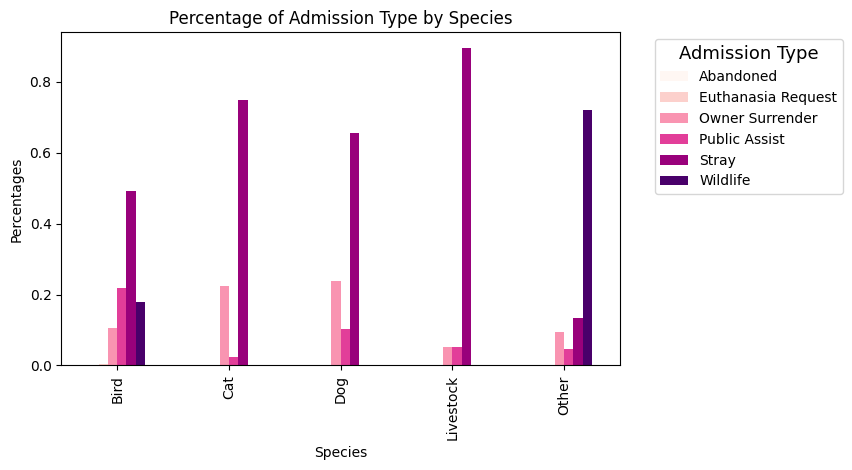

In [ ]:
# Calcula as porcentagens de cada tipo de admissão por tipo de animal
df_percentages = df.groupby('Animal Type')['Intake Type'].value_counts(normalize=True).unstack()

# Cria um gráfico de barras empilhadas horizontal com as porcentagens
plt.figure(figsize=(10,6))
df_percentages.plot(kind='bar', stacked=False, colormap='RdPu')

plt.xlabel('Species')
plt.ylabel('Percentages')
plt.title('Percentage of Admission Type by Species')
plt.tight_layout()  # ajusta o layout para evitar sobreposição de elementos
plt.legend(title='Admission Type', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')  # ajusta a legenda
plt.show()

### *Quais cidades o resgate dos animais é recorrente?*

In [ ]:
#Contagem das cidades
city_counts = df['Found Location'].value_counts()

#Imprime os 20 locais mais comuns
print(city_counts.head(20))

Austin (TX)                              33057
Outside Jurisdiction                      2967
Travis (TX)                               2549
7201 Levander Loop in Austin (TX)         1002
Pflugerville (TX)                          892
Manor (TX)                                 850
Del Valle (TX)                             680
4434 Frontier Trl in Austin (TX)           251
Leander (TX)                               250
124 W Anderson Ln in Austin (TX)           227
1156 W Cesar Chavez in Austin (TX)         215
Round Rock (TX)                            169
4434 Frontier Trail in Austin (TX)         169
Cedar Park (TX)                            168
124 West Anderson Lane in Austin (TX)      159
12034 Research Blvd in Austin (TX)         146
12034 Research in Austin (TX)              130
1156 W Cesar Chavez St in Austin (TX)      125
Hays (TX)                                  111
Lago Vista (TX)                            110
Name: Found Location, dtype: int64


<Figure size 1000x600 with 0 Axes>

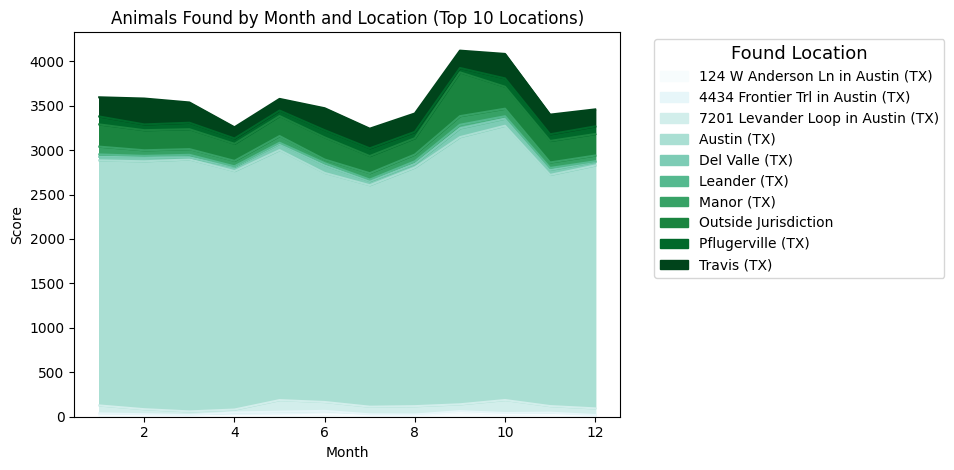

In [ ]:
#Criando nova coluna com mês em 'Date Intake'
df['Month'] = df['Date Intake'].dt.month

#10 locais mais comuns
city_counts = df['Found Location'].value_counts().nlargest(10).index

# Filtra o DataFrame para incluir apenas os 10 locais mais comuns
df_city_counts = df[df['Found Location'].isin(city_counts)]

#Conta o número de animais encontrados em cada mês e localização
monthly_location_counts = df_city_counts.groupby(['Month', 'Found Location']).size().unstack().reset_index()

#Cria um gráfico de área empilhada
plt.figure(figsize=(10,6))
monthly_location_counts.set_index('Month').plot(kind='area', stacked=True, colormap='BuGn')

plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Animals Found by Month and Location (Top 10 Locations)')
plt.tight_layout()  #Ajusta o layout para evitar sobreposição de elementos
plt.legend(title='Found Location', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')  # ajusta a legenda
plt.show()

## *Existe uma sazonalidade?*
## *E em relação às espécies, qual está mais presente no abrigo?*

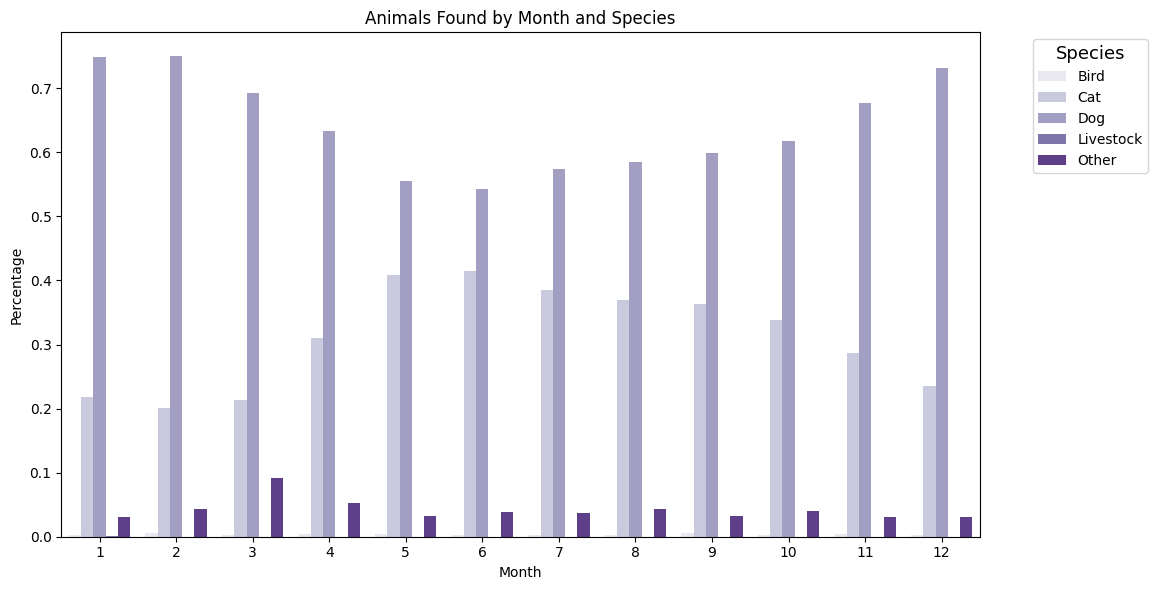

In [ ]:
# Conta o número de animais encontrados em cada mês e espécie
monthly_species_counts = df.groupby([df['Date Intake'].dt.month, 'Animal Type']).size().reset_index(name='counts')

# Calcula as porcentagens
total_monthly_counts = monthly_species_counts.groupby('Date Intake')['counts'].transform('sum')
monthly_species_counts['percentages'] = monthly_species_counts['counts'] / total_monthly_counts

# Cria um gráfico de barras com as porcentagens
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_species_counts, x='Date Intake', y='percentages', hue='Animal Type', palette='Purples')

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Animals Found by Month and Species')
plt.tight_layout()  # ajusta o layout para evitar sobreposição de elementos

# Move a legenda para fora do gráfico
plt.legend(title='Species', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

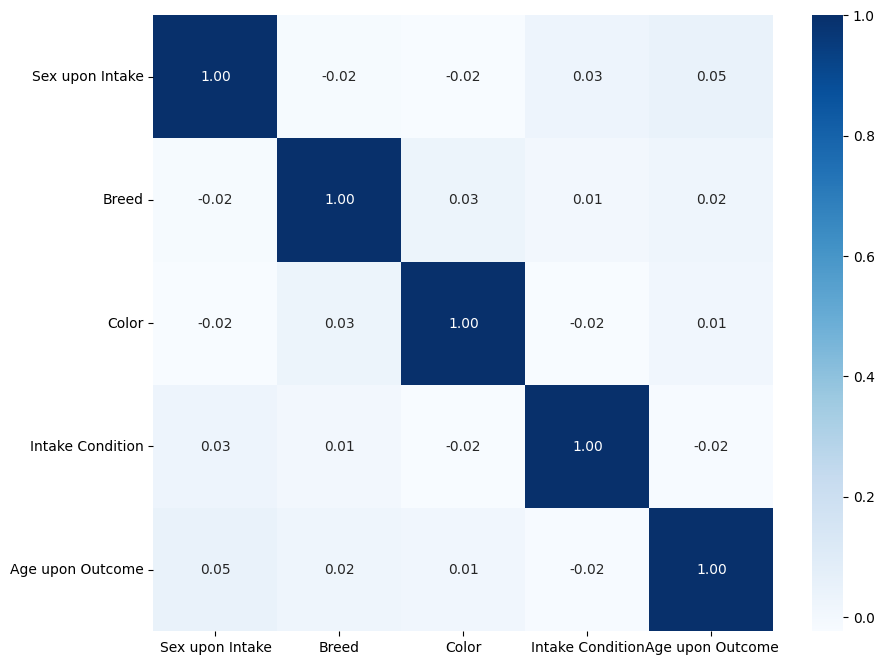

In [ ]:
# Convertendo colunas categóricas em numéricas para análise de correlação
df['Sex upon Intake'] = df['Sex upon Intake'].astype('category').cat.codes
df['Breed'] = df['Breed'].astype('category').cat.codes
df['Color'] = df['Color'].astype('category').cat.codes
df['Intake Condition'] = df['Intake Condition'].astype('category').cat.codes
df['Age upon Outcome'] = df['Age upon Outcome'].astype('category').cat.codes

# Calculando a matriz de correlação
corr = df[['Sex upon Intake','Breed','Color','Intake Condition','Age upon Outcome']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.show()

In [ ]:
# Definindo a variável dependente e as variáveis independentes
X = df[['Sex upon Intake', 'Breed', 'Color', 'Intake Condition']]
y = df['Age upon Outcome']

# Adicionando uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Realizando a regressão linear
model = sm.OLS(y, X)
results = model.fit()

# Imprimindo o resumo dos resultados da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Age upon Outcome   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.69e-117
Time:                        14:40:21   Log-Likelihood:            -6.4956e+05
No. Observations:              160428   AIC:                         1.299e+06
Df Residuals:                  160423   BIC:                         1.299e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               25.8375      0.222  

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving AnimalShelter.ipynb to AnimalShelter.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>